<img src="https://c.pxhere.com/photos/38/26/road_sign_road_trip_desert_landscape_journey_landscape_scenery_safety_asphalt-570062.jpg!d" srcset="https://c.pxhere.com/photos/38/26/road_sign_road_trip_desert_landscape_journey_landscape_scenery_safety_asphalt-570062.jpg!d"  width=1300 height=500 style="
  display: block; margin-left: auto; margin-right: auto; ">


#     **Exploratory Data Analysis - Road Safety Dataset (UK, 2019)**
### **IDA Project Submission - 02**

> ##### Name: Paridhi Arya
> ##### Roll Number: S20210020305
> ##### Dated: 19th November, 2023


---



---






<h2>What is the purpose of exploratory data analysis?</h2>


Exploratory Data Analysis (EDA) is the first stage in understanding datasets by summarizing their main features. It entails detecting patterns, anomalies, and errors in data, which aids in the detection of trends and prospective problems. EDA also facilitates the formulation of early hypotheses, which guide further analysis and feature selection. It efficiently communicates insights and discoveries through visualizations and summary statistics, enabling informed decision-making in subsequent data analysis processes. Ultimately, the purpose of EDA is to give a thorough knowledge of the data, allowing for the formation of hypotheses and informed choices in subsequent analytical phases.

## **About the Dataset**

Following is the information about the significant features of the datase in order to make analysis easier


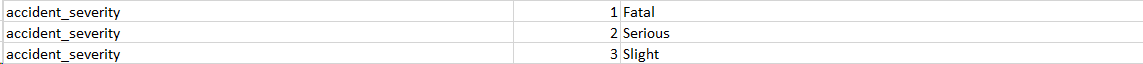


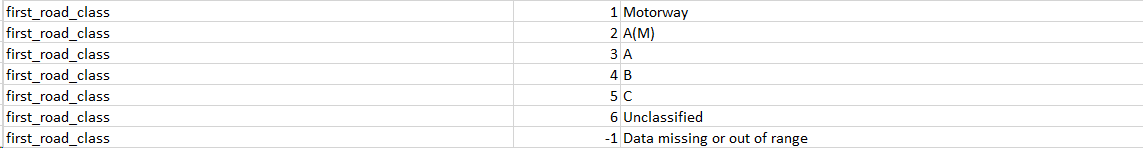

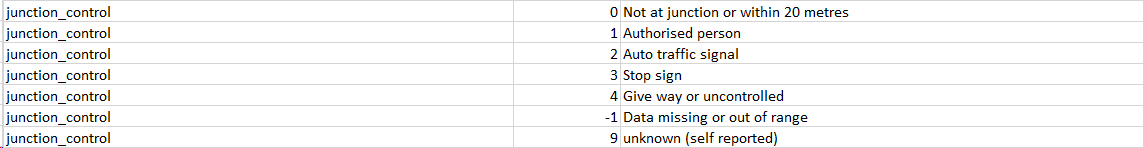

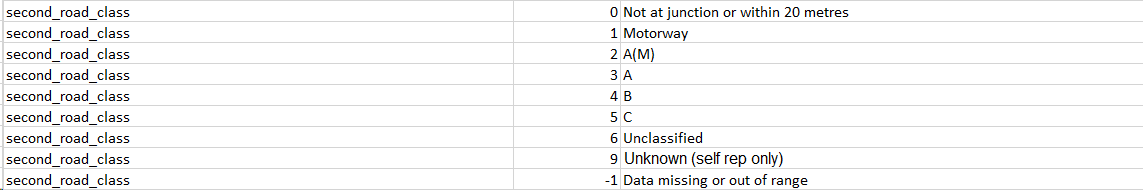

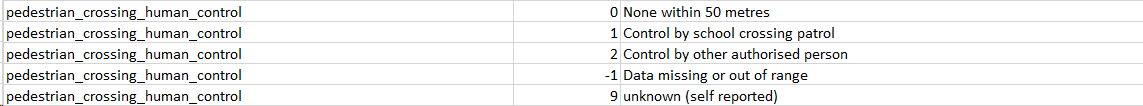

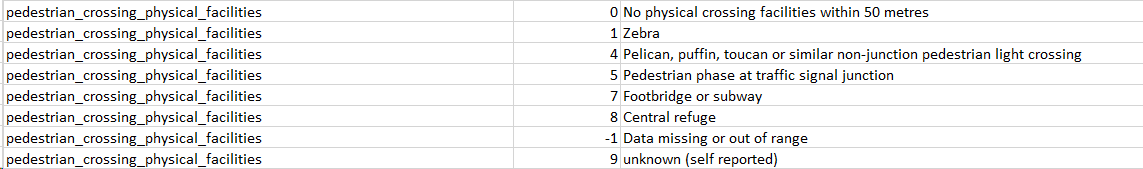

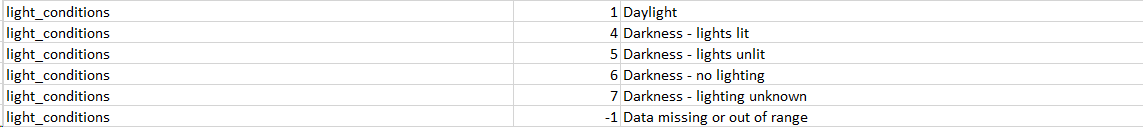

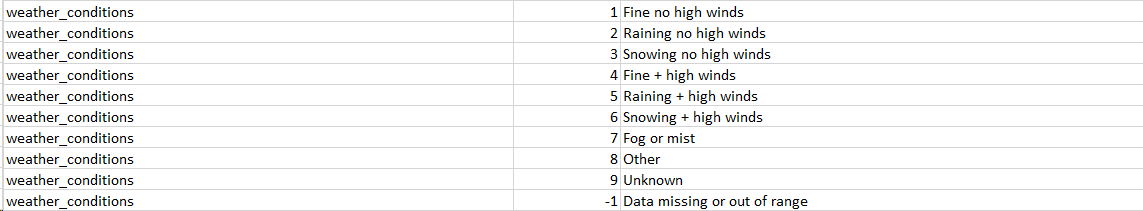

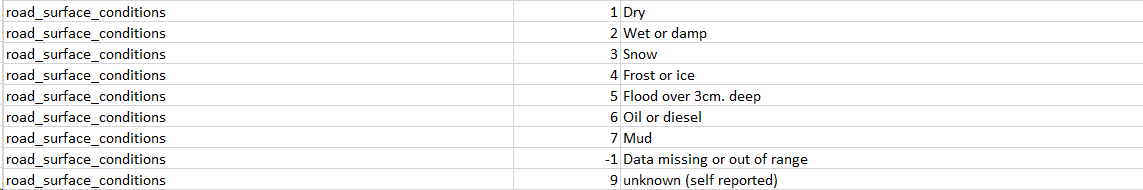

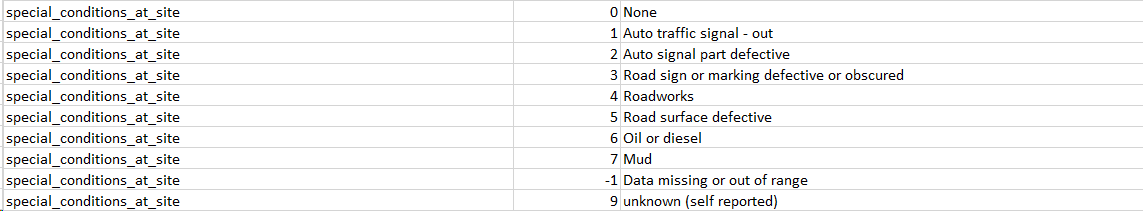

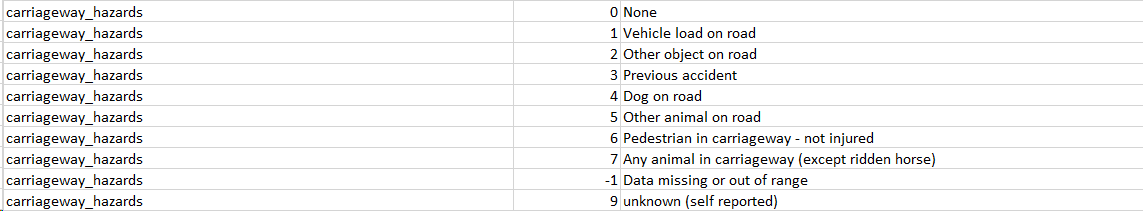

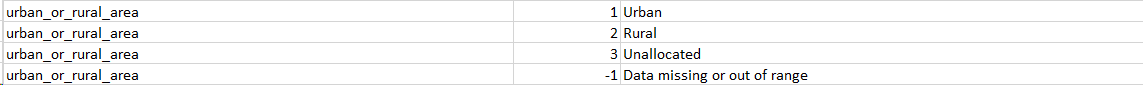

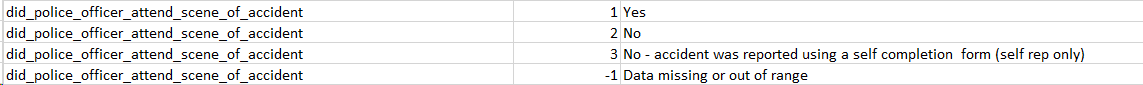

---
### **Data Wrangling**

Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>Import data</h3>
<p>
You can find the "Road Safety Dataset" from the following link: <a href=" https://www.kaggle.com/datasets/mostafafaramin/road-safety-data-accidents-2019/"> https://www.kaggle.com/datasets/mostafafaramin/road-safety-data-accidents-2019/</a>.
We will be using this dataset for the assignment.
</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from itertools import product
import scipy. stats as ss
import geopandas as gpd
from datetime import datetime

Please put the path of the dataset in you PR under 'filename'

In [2]:
filename="/content/UK_Accident.csv"
#Change to path of file

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter "index_col" equal to "None".


In [3]:
df = pd.read_csv(filename, index_col=None)

<ipython-input-3-9159258276a0>:1: DtypeWarning: Columns (0,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None)


---
### **Describing the Data**

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [4]:
# To see what the data set looks like, we'll use the head() method.
#There might be an '' column if we run the code in jupyter notebook, uncomment the following
# to get rid of the same

#df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2020000000000.0,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2020000000000.0,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2020000000000.0,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,1/1/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2020000000000.0,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,1/1/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2020000000000.0,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,1/1/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [5]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,117508.000000,1.175080e+05,117508.000000,117508.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,...,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000
mean,452403.224717,2.786857e+05,-1.249439,52.395427,28.228160,2.772512,1.840976,1.303073,4.111149,326.686522,...,306.326121,-0.005717,0.862340,2.046888,1.653102,1.291945,0.074939,0.044318,1.323569,1.392807
std,95033.024831,1.509356e+05,1.392356,1.359522,24.622519,0.451610,0.708412,0.754369,1.920117,256.494631,...,1160.683698,0.277764,1.996284,1.731131,1.809202,0.598592,0.663085,0.528075,0.468349,0.638504
min,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,388018.250000,1.755260e+05,-2.180604,51.465934,5.000000,3.000000,1.000000,1.000000,2.000000,84.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,459396.000000,2.184650e+05,-1.123331,51.852523,23.000000,3.000000,2.000000,1.000000,4.000000,305.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,529373.250000,3.848040e+05,-0.135499,53.357497,45.000000,3.000000,2.000000,1.000000,6.000000,514.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,655244.000000,1.167366e+06,1.757476,60.388637,98.000000,3.000000,17.000000,52.000000,7.000000,941.000000,...,9899.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

Dataframe info: We have 117536 entries and 32 columns

As we can see, several `NaN` values appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div>

Q. How do we work with missing data?


<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


---
<h2 id="identify_handle_missing_values"> <b>Identify and handle missing values</b> </h2>


#### **Evaluating for Missing Data**

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [7]:
missing_data = df.isnull()
missing_data.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.




---



---


#### **Count missing values in each column**
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values.
</p>


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Accident_Index
False    117536
Name: Accident_Index, dtype: int64

Location_Easting_OSGR
False    117508
True         28
Name: Location_Easting_OSGR, dtype: int64

Location_Northing_OSGR
False    117508
True         28
Name: Location_Northing_OSGR, dtype: int64

Longitude
False    117508
True         28
Name: Longitude, dtype: int64

Latitude
False    117508
True         28
Name: Latitude, dtype: int64

Police_Force
False    117536
Name: Police_Force, dtype: int64

Accident_Severity
False    117536
Name: Accident_Severity, dtype: int64

Number_of_Vehicles
False    117536
Name: Number_of_Vehicles, dtype: int64

Number_of_Casualties
False    117536
Name: Number_of_Casualties, dtype: int64

Date
False    117536
Name: Date, dtype: int64

Day_of_Week
False    117536
Name: Day_of_Week, dtype: int64

Time
False    117473
True         63
Name: Time, dtype: int64

Local_Authority_(District)
False    117536
Name: Local_Authority_(District), dtype: int64

Local_Authority_(Highway)
False    117536



---



---


### **Dealing with NaN values**

Similarly, we will count the number of NaN values in each column

In [9]:
nan_data = df.isna()
nan_data.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
for column in nan_data.columns.values.tolist():
    print(column)
    print (nan_data[column].value_counts())
    print("")

Accident_Index
False    117536
Name: Accident_Index, dtype: int64

Location_Easting_OSGR
False    117508
True         28
Name: Location_Easting_OSGR, dtype: int64

Location_Northing_OSGR
False    117508
True         28
Name: Location_Northing_OSGR, dtype: int64

Longitude
False    117508
True         28
Name: Longitude, dtype: int64

Latitude
False    117508
True         28
Name: Latitude, dtype: int64

Police_Force
False    117536
Name: Police_Force, dtype: int64

Accident_Severity
False    117536
Name: Accident_Severity, dtype: int64

Number_of_Vehicles
False    117536
Name: Number_of_Vehicles, dtype: int64

Number_of_Casualties
False    117536
Name: Number_of_Casualties, dtype: int64

Date
False    117536
Name: Date, dtype: int64

Day_of_Week
False    117536
Name: Day_of_Week, dtype: int64

Time
False    117473
True         63
Name: Time, dtype: int64

Local_Authority_(District)
False    117536
Name: Local_Authority_(District), dtype: int64

Local_Authority_(Highway)
False    117536



---



---


<h3 id="deal_missing_values"> <b> Dealing with missing data </b> </h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty.

In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:


<b>Replace by mean:</b>

<ul>
    <li>"Longitude": 28 missing data, replace them with mean</li>
    <li>"Latitude": 28 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>WAY I: "Time": 63 missing data, can replace with the most frequent time
        <ul>
            <li>Reason: 1139 entries are at 17:00 hours. The other timestamps with highest value counts also occur near 17:00, such as 17:30 and 16:30. </li>
        </ul>
    </li>
</ul>

<b>Replace with logically identified values (categorical variables, based on frequency):</b>

<ul>
    <li> "Road_Surface_Conditions" </li>
    <li> "Special_Conditions_at_Site"</li>
    <li> "Carriageway_Hazards"</li>
    <li> "Did_Police_Officer_Attend_Scene_of_Accident" </li>
    <li> "Weather_Conditions"</li>
    <li> "Junction_Control"  </li>
    <li> "Location_Northing_OSGR" </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>Way II: "Time": 63 missing data, simply delete the whole row
        <ul>
            <li>Reason: Another way we can deal with missing data is to simply drop the 63 rows as we already have 117536 rows and we will have a lower accuracy while predicting time</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean values for the "Longitude" and "Latitude" columns </h4>


In [11]:
avg_longitude = df["Longitude"].astype("float").mean(axis=0)
avg_latitude = df["Latitude"].astype("float").mean(axis=0)
print("Mean Longitude:", avg_longitude)
print("Mean Latitude:", avg_latitude)

Mean Longitude: -1.2494388302498556
Mean Latitude: 52.39542691314634


<h4>Replace "null" and "NaN" with mean values for the "Longitude" and "Latitude" columns </h4>


In [12]:
df["Longitude"].replace(np.nan, avg_longitude, inplace=True)
df["Latitude"].replace(np.nan, avg_latitude, inplace=True)
df['Longitude'].fillna(value=avg_longitude, inplace=True)
df['Latitude'].fillna(value=avg_latitude, inplace=True)

As NULL values are less as compared to size of whole data in some categorical data columns, while preprocessing the data we can fill the null values with logically identified values from each feature.

In [13]:
df['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
df['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
df['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
df['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
df['Junction_Control'].fillna(value = 'None', inplace = True)
df['Location_Northing_OSGR'].fillna(value = 0, inplace = True)

We can also use the `.idxmax()` method to calculate the most common type automatically:


In [14]:
df['Time'].value_counts()

17:00    1139
17:30    1035
16:00     997
16:30     992
18:00     986
         ... 
4:43        3
4:39        3
4:31        2
3:49        2
4:24        1
Name: Time, Length: 1439, dtype: int64

In [15]:
most_freq_time = df['Time'].value_counts().idxmax()

The replacement procedure is very similar to what we have seen previously:


In [16]:
#replace the missing 'Time' values by the most frequent
df["Time"].replace(np.nan, most_freq_time, inplace=True)

Now, the final column left is `LSOA_of_Accident_Location`, we can not predict the values for the column, hence, we can drop the rows which are missing values for it.

In [17]:
df.dropna(subset=['LSOA_of_Accident_Location'], inplace=True)

Finally, we can view the cleaned dataframe.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111822 entries, 0 to 111851
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               111822 non-null  object 
 1   Location_Easting_OSGR                        111822 non-null  float64
 2   Location_Northing_OSGR                       111822 non-null  float64
 3   Longitude                                    111822 non-null  float64
 4   Latitude                                     111822 non-null  float64
 5   Police_Force                                 111822 non-null  int64  
 6   Accident_Severity                            111822 non-null  int64  
 7   Number_of_Vehicles                           111822 non-null  int64  
 8   Number_of_Casualties                         111822 non-null  int64  
 9   Date                                         111822 non-nul



---



---


<h3 id="correct_data_format"><b>Correct data format</b></h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

 `  .dtype() ` to check the data type

` .astype() ` to change the data type


<h4>Let's list the data types for each column</h4>


In [19]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

As we can see above, some columns are not of the correct data type. Numerical variables should have type `float` or `int`, and variables with strings such as categories should have type `object`. For example, `Time` is an `int64` value and is not being read as time.We have to convert data types into a proper format for each column using the `astype()` method or `pd.to_datetime()` method.


<h4>Convert data types to proper format</h4>


In [20]:
df['Date']= pd.to_datetime(df['Date']) # format= "%d/%m/%Y"
df['Time']= pd.to_datetime(df['Time'])

<ipython-input-20-8337ad341484>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']= pd.to_datetime(df['Date']) # format= "%d/%m/%Y"


<h4>Let us list the columns after the conversion</h4>


In [21]:
df.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                 float64
Location_Northing_OSGR                                float64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                             int64
Time                                           datetime64[ns]
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Typ

<h2 id="data_visualization"><b> Data Visualization </b></h2>

Visualizing large datasets is crucial for distilling complex information into understandable visuals, assisting in identifying patterns, relationships, and outliers that might be concealed in raw data.  These visual representations make data interpretation easier and allow for the finding of trends or correlations that can be used to inform decision-making processes. Visualizations are powerful communication tools, allowing both professionals and non-experts to understand and get insights from large datasets. Analysts may reveal hidden insights and anomalies by interactively studying data through visualizations, developing a deeper understanding and aiding data-driven decisions. Finally, visualizations are critical in converting large amounts of data into usable knowledge, facilitating greater understanding, exploration, and informed decision-making.



---


### **I. Correlation Analysis using Correlation Matrix**




In [22]:
corr_max = df.corr(numeric_only=True)
corr_max

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.000000,-0.246902,0.999779,-0.251085,-0.185433,0.028420,0.019175,-0.036390,0.001490,-0.251946,...,-0.052493,-0.054285,0.060094,0.016370,0.008940,-0.060582,-0.016286,-0.012503,-0.118137,0.120024
Location_Northing_OSGR,-0.246902,1.000000,-0.242367,0.999960,-0.383948,-0.046975,-0.010765,0.030423,0.007468,-0.330242,...,0.027431,0.059142,-0.011948,-0.019193,-0.003131,0.038975,0.005504,0.004962,0.025743,-0.023541
Longitude,0.999779,-0.242367,1.000000,-0.246593,-0.183107,0.028076,0.019061,-0.035967,0.001501,-0.249478,...,-0.052704,-0.053644,0.059244,0.016165,0.008034,-0.060090,-0.016291,-0.012587,-0.115969,0.119109
Latitude,-0.251085,0.999960,-0.246593,1.000000,-0.383850,-0.046844,-0.010693,0.030356,0.007450,-0.329918,...,0.028308,0.059161,-0.011661,-0.019253,-0.003217,0.039018,0.005497,0.004912,0.025088,-0.023711
Police_Force,-0.185433,-0.383948,-0.183107,-0.383850,1.000000,-0.047198,0.024673,0.050774,-0.009162,0.980902,...,0.021686,0.094098,-0.138034,-0.002577,-0.051649,0.080024,0.035507,0.038028,0.337907,-0.214348
Accident_Severity,0.028420,-0.046975,0.028076,-0.046844,-0.047198,1.000000,0.066118,-0.077805,0.005261,-0.050686,...,0.017315,-0.040712,0.012387,-0.046595,0.030723,-0.020427,-0.004796,-0.016681,-0.096573,0.162243
Number_of_Vehicles,0.019175,-0.010765,0.019061,-0.010693,0.024673,0.066118,1.000000,0.216643,-0.004689,0.023551,...,0.010989,-0.009261,-0.060536,-0.062692,-0.035345,-0.023793,-0.008312,-0.026359,0.057108,-0.036455
Number_of_Casualties,-0.036390,0.030423,-0.035967,0.030356,0.050774,-0.077805,0.216643,1.000000,0.004085,0.054815,...,-0.001646,0.021694,-0.029948,0.029992,-0.024695,0.027421,0.015233,0.009456,0.134925,-0.109404
Day_of_Week,0.001490,0.007468,0.001501,0.007450,-0.009162,0.005261,-0.004689,0.004085,1.000000,-0.008559,...,0.001337,-0.003137,-0.000933,0.014659,0.017381,0.027237,0.000905,-0.002531,-0.013351,0.006891
Local_Authority_(District),-0.251946,-0.330242,-0.249478,-0.329918,0.980902,-0.050686,0.023551,0.054815,-0.008559,1.000000,...,0.021487,0.098733,-0.140102,-0.004744,-0.051654,0.084774,0.035117,0.038287,0.334801,-0.217855


To understand this further, we may visualize the correlation matrix using a heatmap.

<Axes: >

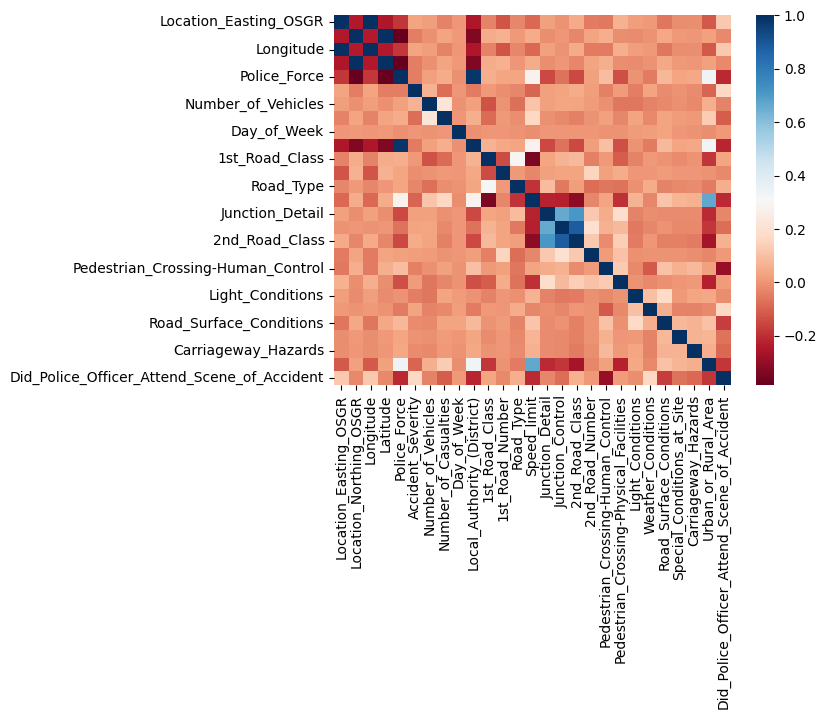

In [23]:
sns.heatmap(corr_max, cmap='RdBu')

In [24]:
corr_max['Accident_Severity'].sort_values(ascending=False).to_frame()

,Accident_Severity
Accident_Severity,1.000000
Did_Police_Officer_Attend_Scene_of_Accident,0.162243
Number_of_Vehicles,0.066118
2nd_Road_Class,0.048677
Weather_Conditions,0.030723
Junction_Control,0.030234
Location_Easting_OSGR,0.028420
Longitude,0.028076
Junction_Detail,0.024417
2nd_Road_Number,0.017315


<Axes: >

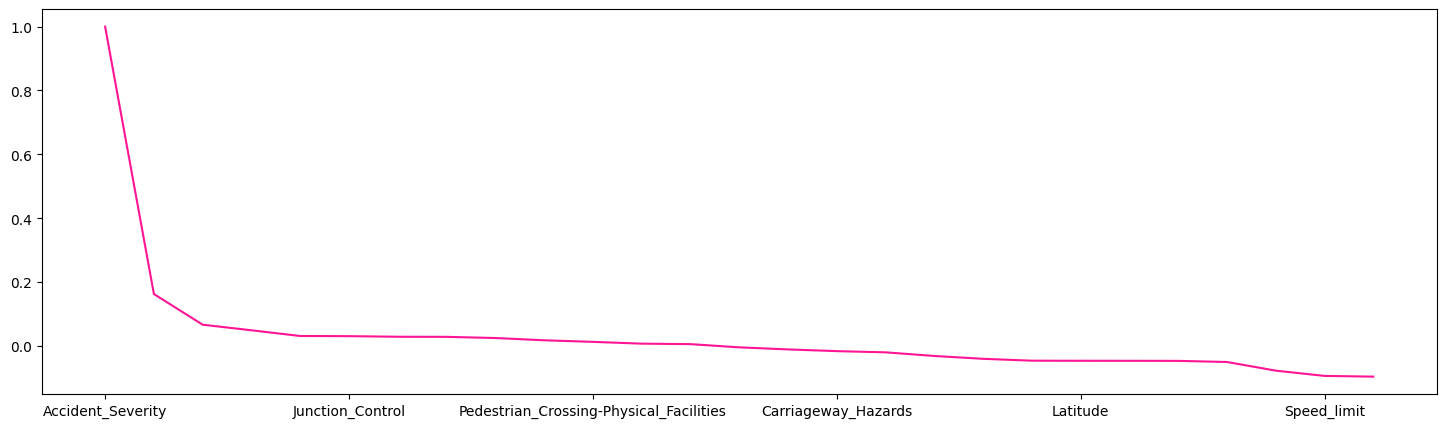

In [25]:
plt.figure(figsize=(18,5))
corr_max['Accident_Severity'].sort_values(ascending=False).plot(color='deeppink')

#### **Inferences:**

1. `Police Force` and `Local Authority (District)` are very highly correlated - _`0.98`_
<ul>
<li> This suggests that the respective of police force on the scene of accident is higly dependent on the local authority of the district. This makes sense as the police force will be of the same district as the local authority. </li>
</ul>

2. `Junction Control` and `2nd Road Class` are highly positively correlated - _`0.88`_

<ul>
<li> Junction Control utilizes traffic monitoring and overhead lane-use signals to control access to both mainline and ramp lanes at interchange areas where high traffic volumes are present and the relative demand on the mainline and ramps change throughout the day. </li>
<li> Class 2 roads refer to the roads which form the primary transport network for an urban area as a whole, and which are characterized by high volumes traffic, restricted access and higher speed limits</li>

<li>This suggests that the degree and type of junction contol is higly dependent on the type of class 2 road, such as motorways. </li>
</ul>

3. `Speed Limit` and `Type of Area (Urban/Rural)` - _`0.67`_
<ul>
<li> This suggests that the speed limit is higly dependent on the type of area, i.e., urban areas have a higher speed limit as compared to rural areas. </li>
</ul>


### **II. How did the number of casualties and vehicles vary over time?**

We notice no significant negative correlation relationships in our features, as the maximum negative correlation we see is around -0.09.

 We can also visualize the variation of number of casualties over time

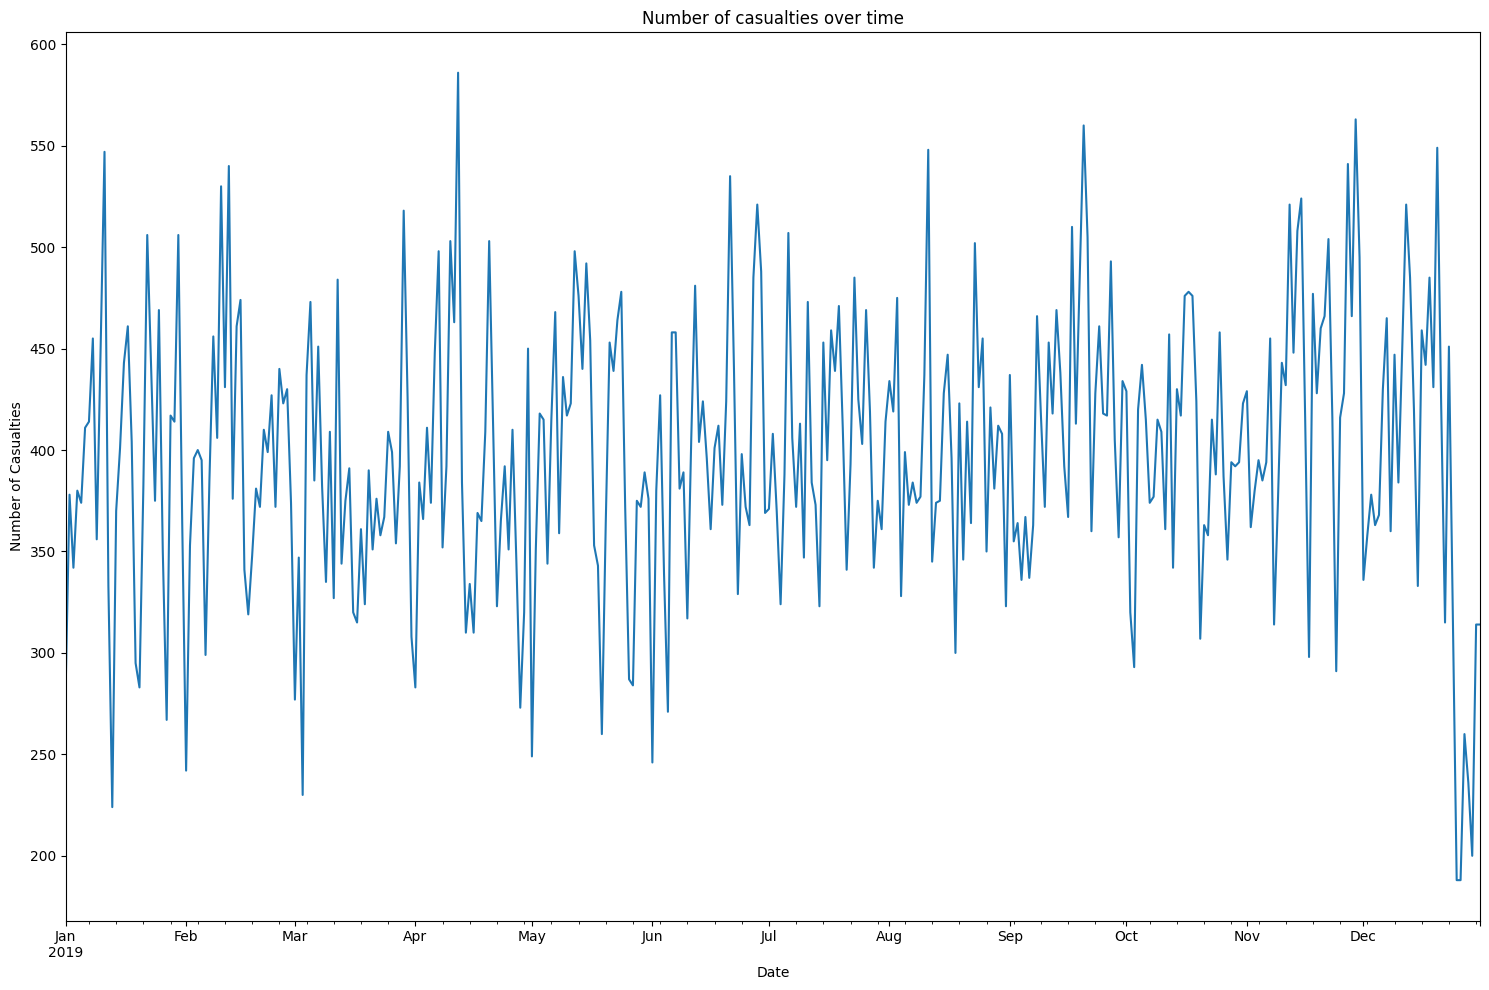

In [26]:
cas_by_date = df['Number_of_Casualties'].groupby(df['Date']).sum().to_frame()
plt.figure(figsize=(15, 10))
cas_by_date['Number_of_Casualties'].plot(kind='line')
plt.ylabel('Number of Casualties')
plt.xlabel('Date')
plt.title('Number of casualties over time')
plt.tight_layout()


Text(0.5, 1.0, 'Number of Vehicles')

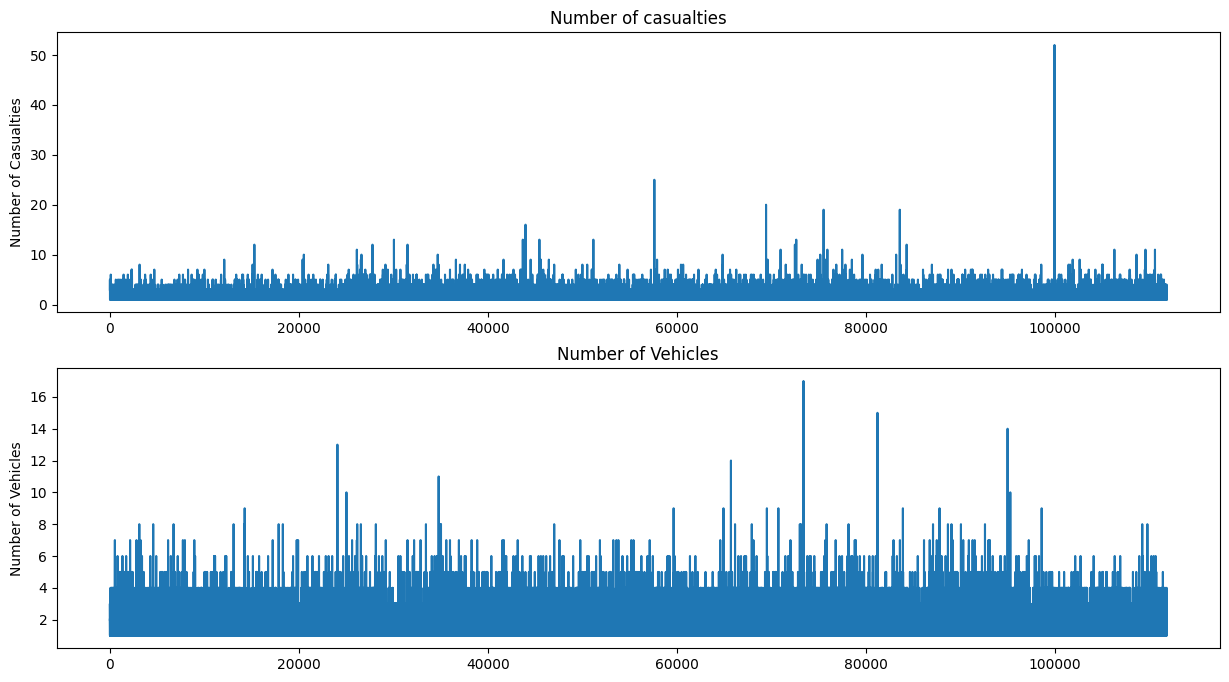

In [27]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(df['Number_of_Casualties'])
plt.ylabel('Number of Casualties')
plt.title('Number of casualties')
plt.subplot(2, 1, 2)
plt.plot(df['Number_of_Vehicles'])
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles')

#### **Inference**
Clearly, we don't see any monotonic patterns. Hence, there hasn't been an increase or decrease in the number of casualties or number of vehicles involved over time, i.e. it seems to be random.

### **III. Plotting the accident locations on map**

In [28]:
df_geo = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude))

In [29]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

<ipython-input-29-e83b6b35728d>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


<Axes: >

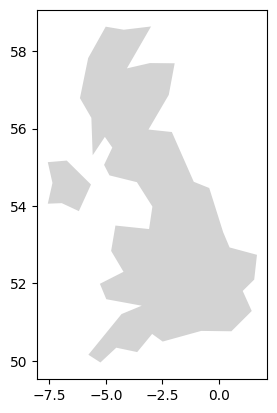

In [30]:
countries[countries["name"] == "United Kingdom"].plot(color="lightgrey")

Text(0.5, 1.0, 'Accident Locations')

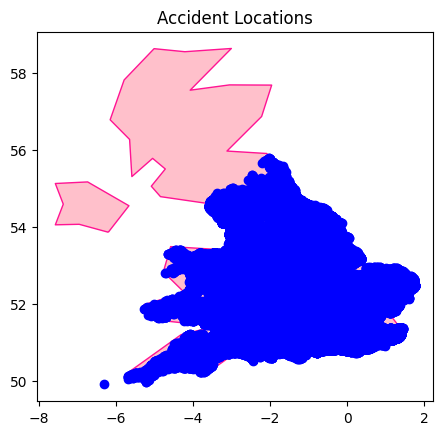

In [31]:
axis = countries[countries["name"] == "United Kingdom"].plot(color = 'pink', edgecolor='deeppink')
df_geo.plot(ax = axis, color = 'blue')
plt.title('Accident Locations')

### **IV. Correlation analysis using visual means (KDE plots, regression plots and scatter plots)'**

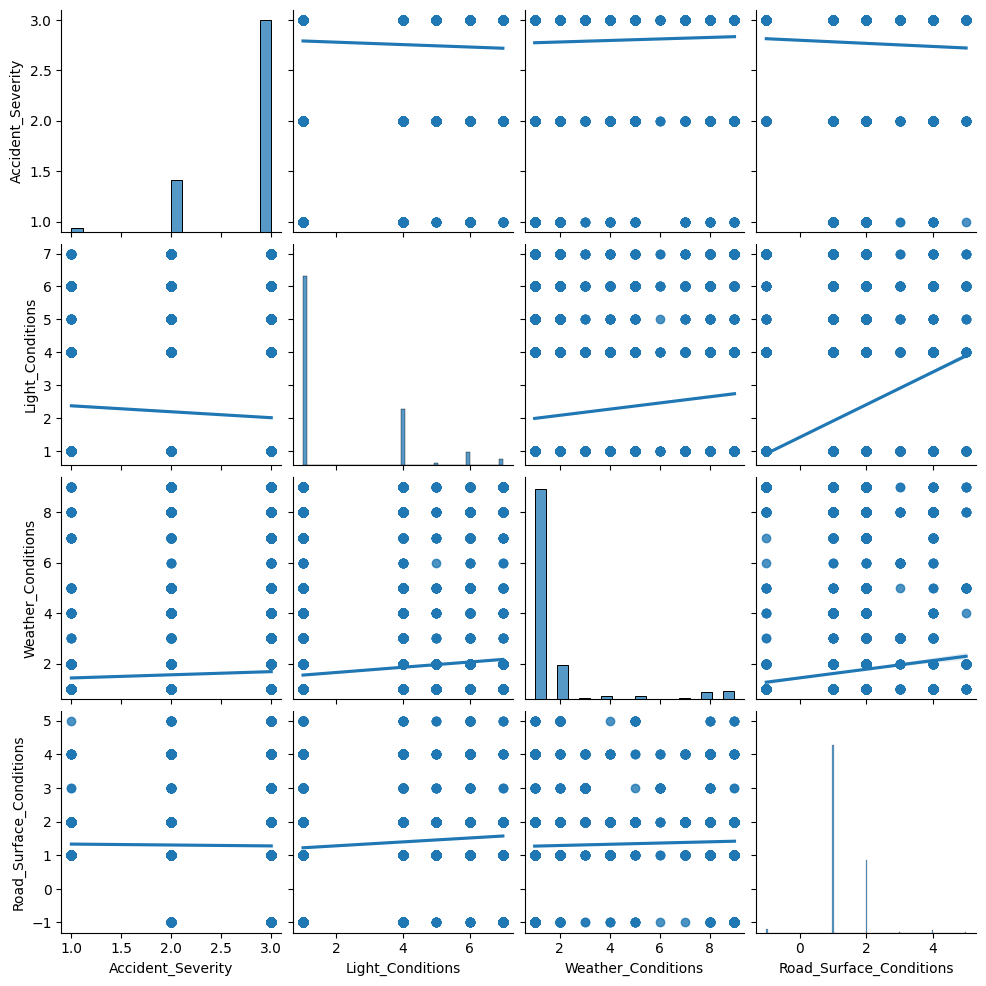

In [32]:
df3 = df[['Accident_Severity','Light_Conditions','Weather_Conditions','Road_Surface_Conditions']];
sns.pairplot(df3, kind='reg');

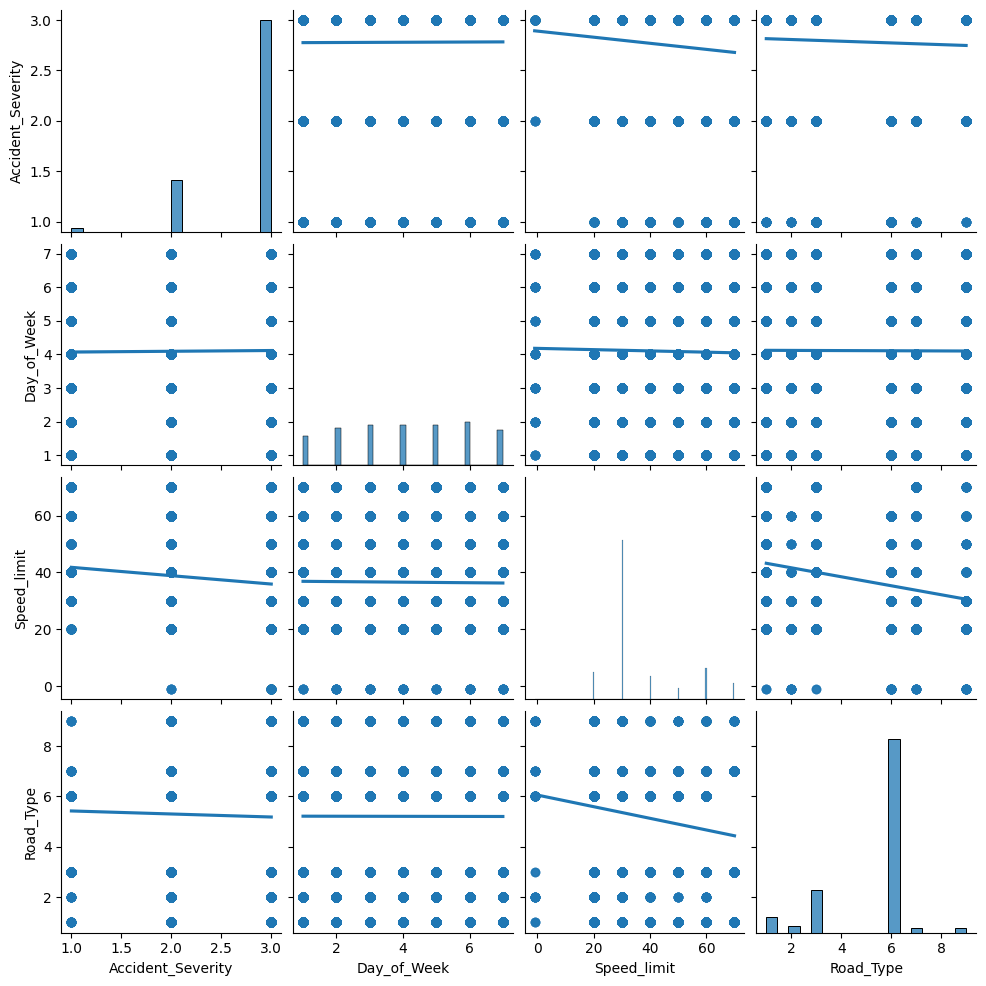

In [33]:
df2 = df[['Accident_Severity','Day_of_Week','Speed_limit','Road_Type']];
sns.pairplot(df2, kind='reg');

Seaborn Kdeplots can even be used to plot the data against multiple data variables or bivariate variables to depict the probability distribution of one with respect to the other values. This is done using contour plots under seaborn.

'Contour plots' or 'level plots' are a tool for doing multivariate analysis and visualizing 3-D plots in 2-D space. If we consider X and Y as our variables we want to plot then the response Z will be plotted as slices on the X-Y plane due to which contours are sometimes referred as Z-slices or iso-response.


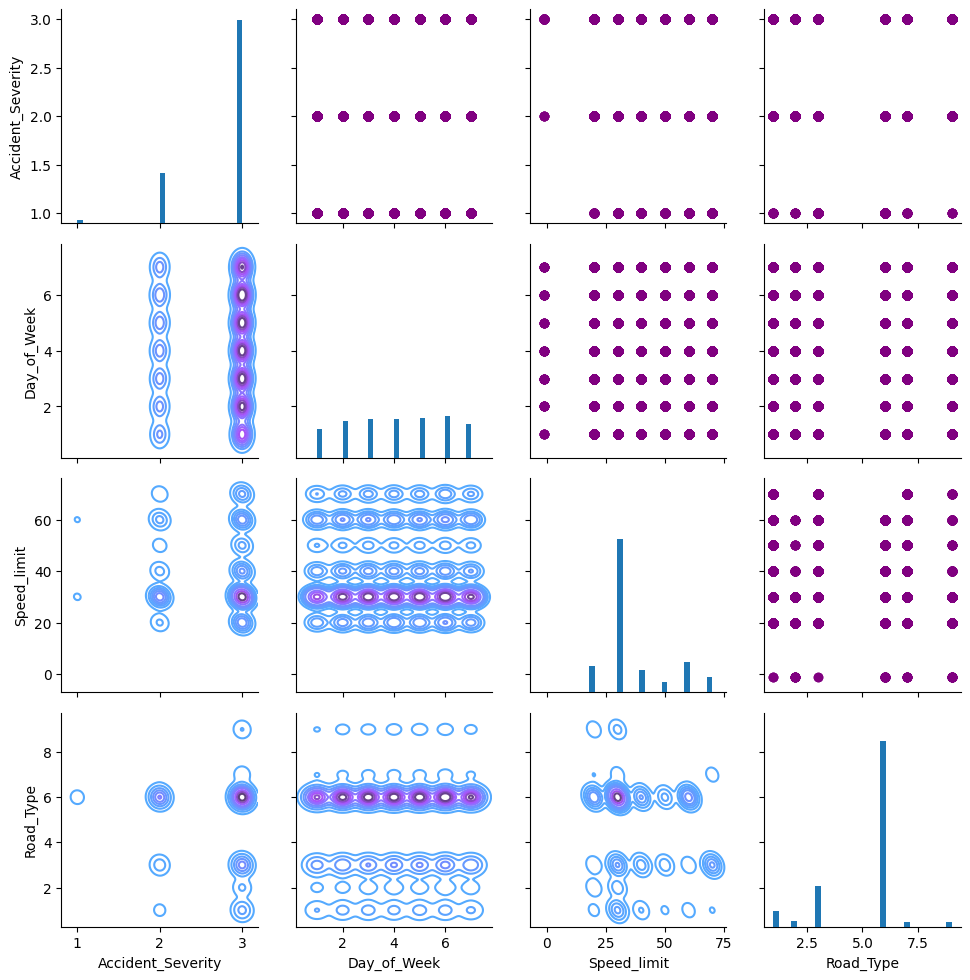

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(df2.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

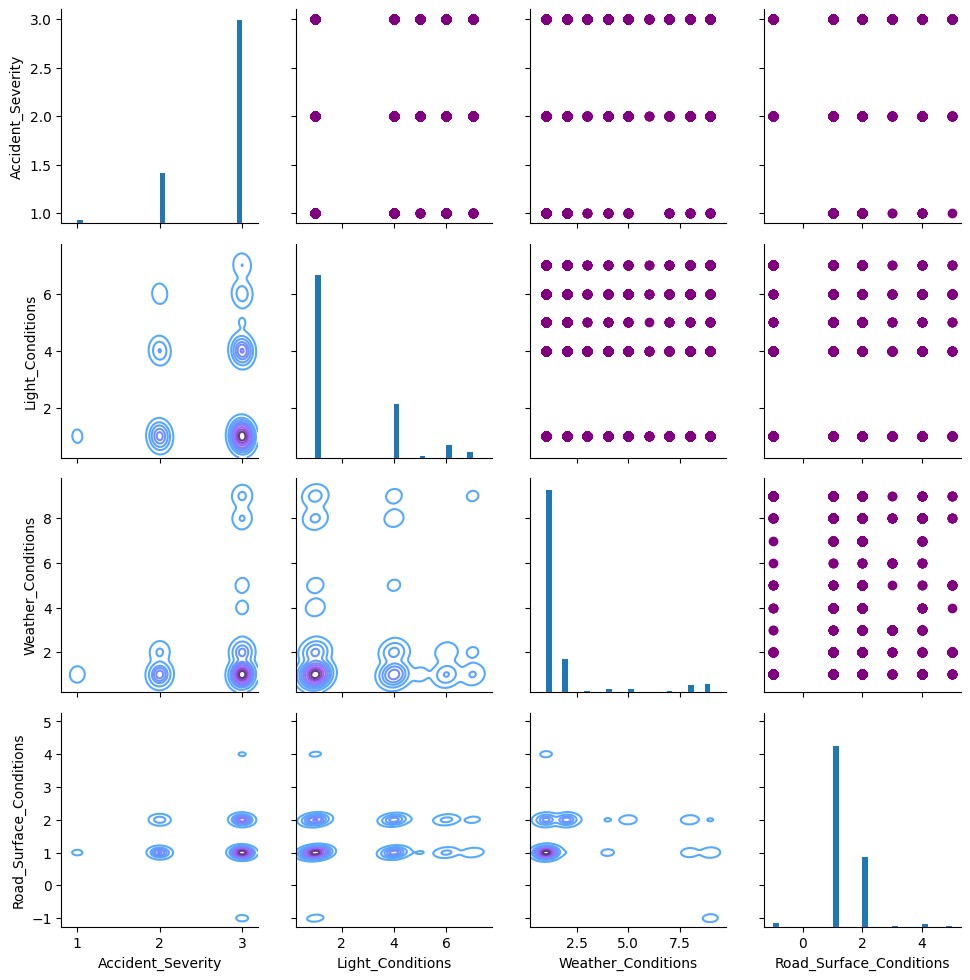

In [35]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(df3.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

#### **Inferences**:
- As per our intuition, we might think that the number of accidents will be larger when the light and weather conditions are worse. For example, when there is no there light present (especially during the dark or at night), the number of accidents would likely be greater than normal. Similarly, bad weather conditions like turbulent winds, excessive rainfall or snowing etc. could lead to more number of accidents.

- From Data: From the above correlation matrix as well as regression plot of the data, we can observe that both `Light_conditions` and `Weather_Conditions` don't have much effect on `Accident_severity` as the regression lines are alomst parallel to the x-axis and the correlation p-values are near to 0.

#### **V. Which road types and classes have had the maximum number of casualties**

<Axes: ylabel='Road_Type'>

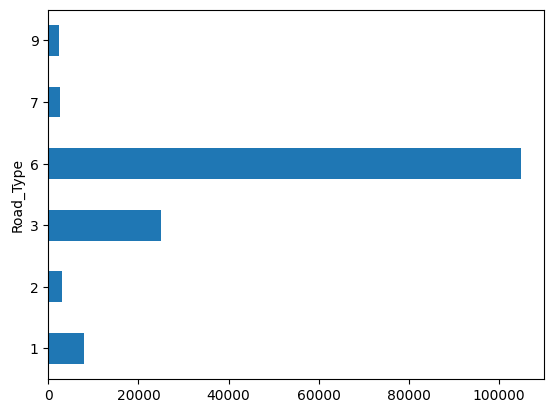

In [36]:
df['Number_of_Casualties'].groupby(df['Road_Type']).sum().plot.barh()

<Axes: ylabel='1st_Road_Class'>

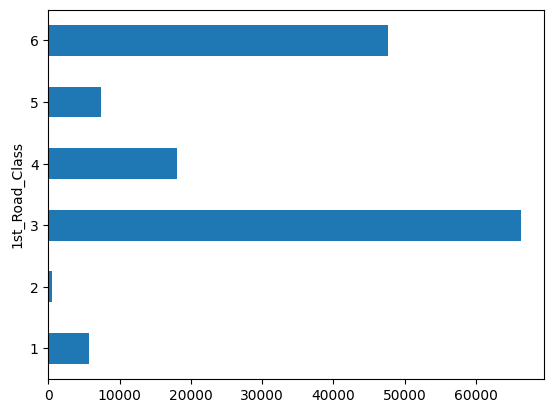

In [37]:
df['Number_of_Casualties'].groupby(df['1st_Road_Class']).sum().plot.barh()

<Axes: ylabel='2nd_Road_Class'>

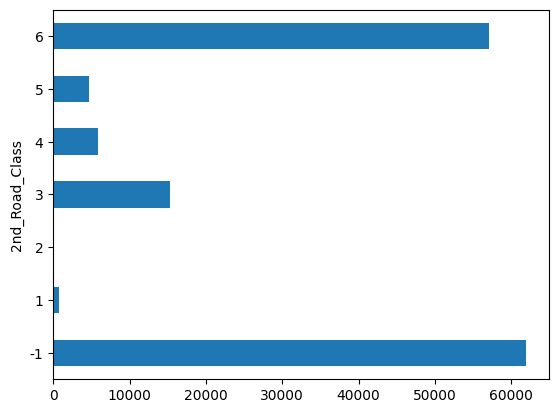

In [38]:
df['Number_of_Casualties'].groupby(df['2nd_Road_Class']).sum().plot.barh()

#### **Inference**:

- We can clearly see that `Road Type 6 (Single Carriageway)` has the maximum number of casualties, followed by `Road type 3 - (Dual Carriageway)`.
- The maximum number of casualties occur in `Road Class 3 - 'A'`

#### **VI. Do more accidents occur in urban areas?**

<Axes: ylabel='Urban_or_Rural_Area'>

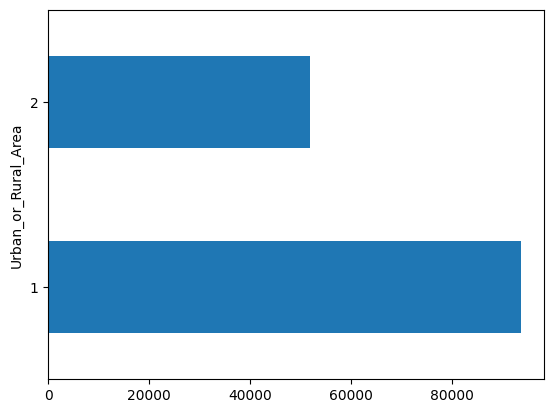

In [39]:
df['Number_of_Casualties'].groupby(df['Urban_or_Rural_Area']).sum().plot.barh()

#### **Inference**:

We can clearly see that `Urban (Type 1)` areas have more number of casualties than `Rural (Type 2)` areas, as one would expect.

#### **VI. Do special conditions or carriageway hazards increase the number of casualties?**

<Axes: ylabel='Carriageway_Hazards'>

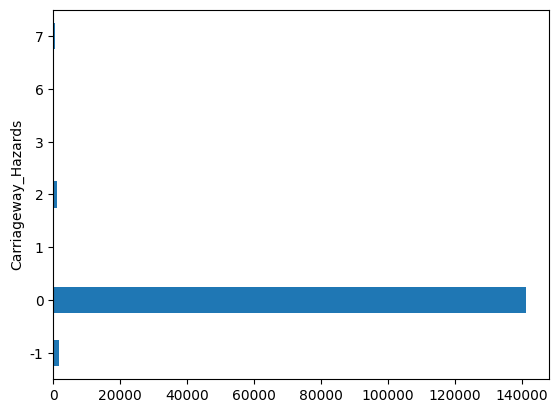

In [40]:
df['Number_of_Casualties'].groupby(df['Carriageway_Hazards']).sum().plot.barh()

<Axes: ylabel='Special_Conditions_at_Site'>

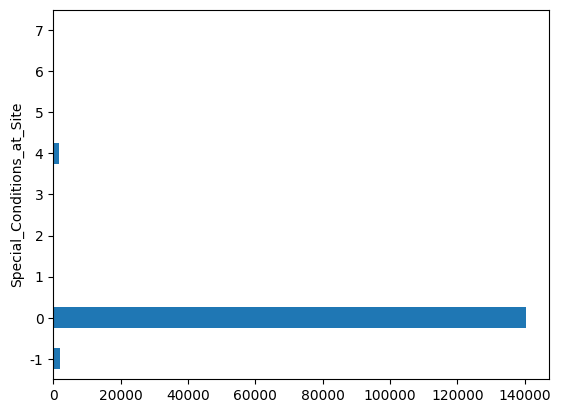

In [41]:
df['Number_of_Casualties'].groupby(df['Special_Conditions_at_Site']).sum().plot.barh()

#### **Inference**:

We can clearly see for both `Special_Conditions_at_Site` and `Carriageway_Hazards` have the highest number of casualties for value `0 i.e. None`. Hence, clearly, special conditions at site and carriageway hazards, such as animals or pedestrians on road, don't have a great impact on the number of casualties.

#### **VII. Do environmental conditions cause more casualties?**

<Axes: ylabel='Road_Surface_Conditions'>

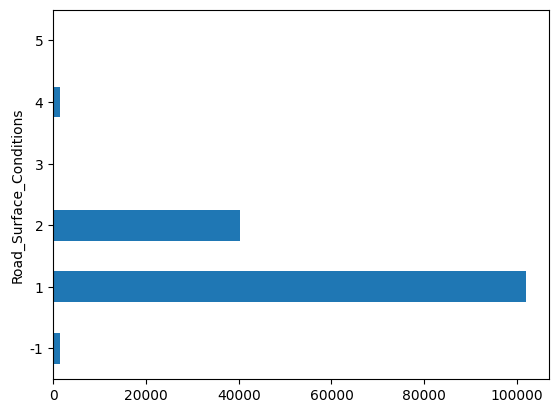

In [42]:
df['Number_of_Casualties'].groupby(df['Road_Surface_Conditions']).sum().plot.barh()

<Axes: ylabel='Light_Conditions'>

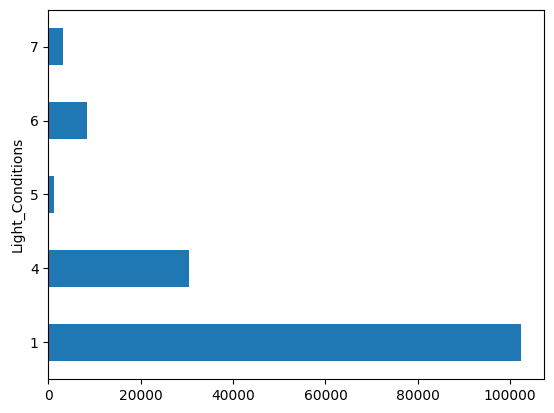

In [43]:
df['Number_of_Casualties'].groupby(df['Light_Conditions']).sum().plot.barh()

<Axes: ylabel='Weather_Conditions'>

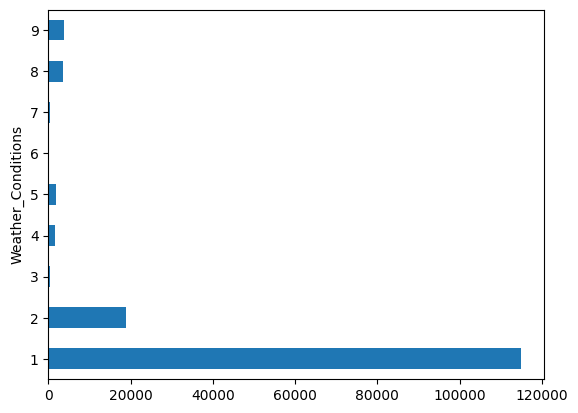

In [44]:
df['Number_of_Casualties'].groupby(df['Weather_Conditions']).sum().plot.barh()

#### **Inference**:

- We can clearly see that for `Road Surface Conditions`, the maximum number of casualties occur for `1 (Dry)` roads, followed by `2 (Wet/Damp)` roads. Hence, wet/damp roads do tend to increase the number of casualties.
- An interesting finding comes for `Lighting Conditions`. Contrary to what one might expect, a higher number of casualties is observed for `Daylight (1)` and `Darkness - lights lit (4)`, as compared to complete darkness or no lighting.
- Now, for `Weather Conditions`, the maximum number of casualties occur for `1 (Fine, no high winds)` days, followed by `2 (Raining, no high winds)` days. Hence, rain does tend to increase the number of casualties, perhaps due to lower visibility.

#### **VIII. Does Road Type affect Accident Severity?**

<Axes: xlabel='Road_Type', ylabel='Accident_Severity'>

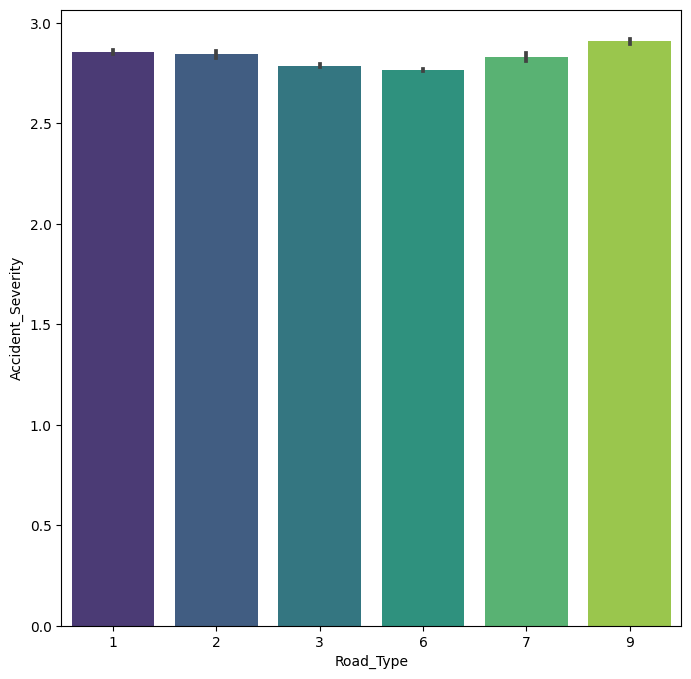

In [45]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'Road_Type', y = 'Accident_Severity', data = df, palette='viridis')

#### **Inference**:

We can clearly see that `Road Type 7 - Slip Road` (neglecting `Road Type 9 - unknown`) has the most severe accidents while `Road Type 6 (Single Carriageway)` has the least severe accidents. However, there isn't much of a magnitude difference in the severity of accidents between the maxima and minima.

#### **IX. Do Road Surface Conditions affect Accident Severity?**

<Axes: xlabel='Road_Surface_Conditions', ylabel='Accident_Severity'>

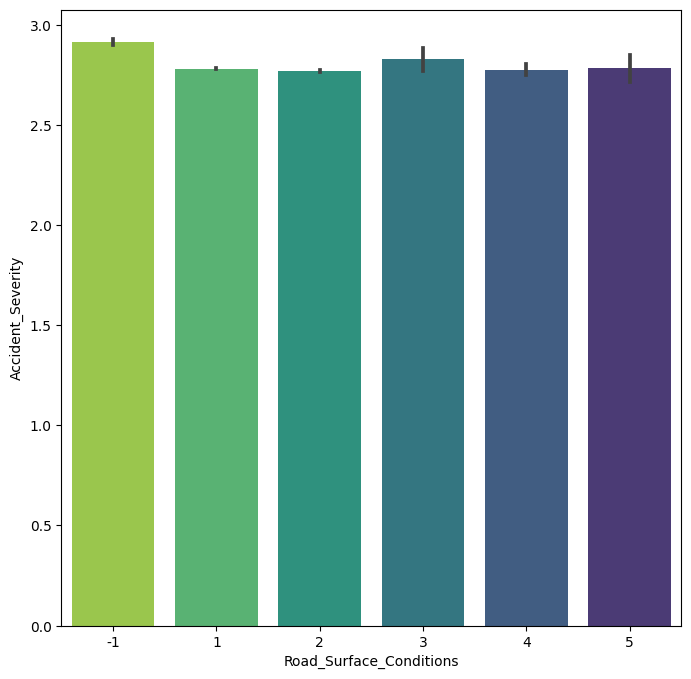

In [46]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'Road_Surface_Conditions', y = 'Accident_Severity', data = df, palette='viridis_r')

#### **Inference**:

We can clearly see that `Road Surface Condition 2 - Wet Damp` has the most severe accidents while `Road Surface Condition 1 - Dry` has the least severe accidents. However, there isn't much of a magnitude difference in the severity of accidents between the maxima and minima and hence, accident severity isn't very affected by the road surface conditions.



---


### **Combined Inferences**
- Although `Road Type 6 - Single Carriageway` has the highest number of casualties, it has the least accident severity amongst all road types.

- Although most accidents occur in `Road Surface Condition 1 - Dry`, the accidents are the least severe.



---


#### **X. Are accidents more severe on some days than others?**





In [47]:
accsev_by_week = df.groupby(by='Day_of_Week').sum().sort_values(by = 'Number_of_Casualties', ascending = False)
accsev_by_week.head()

<ipython-input-47-2620c5296a90>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  accsev_by_week = df.groupby(by='Day_of_Week').sum().sort_values(by = 'Number_of_Casualties', ascending = False)


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Class,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
6,8.359650e+09,4.709146e+09,-20178.624505,946649.086299,447608,50523,33562,23467,5349637,76059,...,5714317,-88,15579,37558,30830,24087,1355,766,23912,25438
5,7.867920e+09,4.389472e+09,-19145.708304,891539.054548,422212,47555,31648,21681,5043184,72066,...,5213253,-116,14808,34172,28341,21837,1123,662,22401,24113
4,7.792250e+09,4.343928e+09,-19109.621621,883895.214115,423768,47185,31419,21500,5057194,71559,...,5007930,-171,14440,33010,27350,22012,1469,720,22071,23867
3,7.723618e+09,4.280379e+09,-18666.411863,874094.614817,422046,46736,31043,21244,5027705,70617,...,5362261,-86,14746,32924,28136,21718,1262,610,22040,23533
7,6.817330e+09,3.844226e+09,-16657.297975,773234.155163,359108,40900,26879,20340,4295143,61591,...,4615439,-204,12592,33081,25275,18896,1054,645,19579,20420


Text(0.5, 0, 'Day of Week')

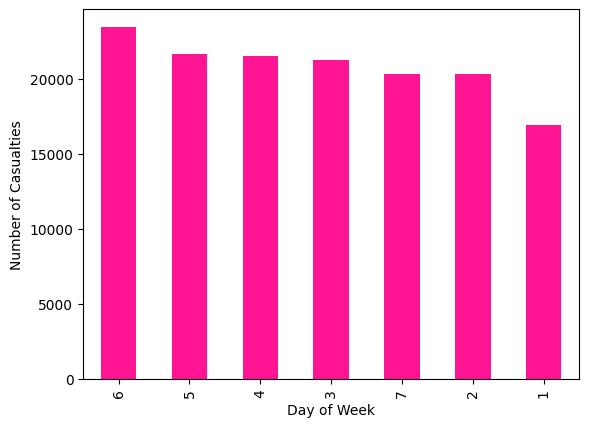

In [48]:
accsev_by_week['Number_of_Casualties'].plot(kind='bar', color = "deeppink")
plt.ylabel('Number of Casualties')
plt.xlabel('Day of Week')

#### **Inferences**:

We can clearly see that `Day 6 (Friday)` of the week has the most severe accidents while `Day 1 (Sunday)` of the week has the least severe accidents. There is a considerable difference of roughly 5000 casualties, which implies that high traffic, amongst other reasons, on day 6, could contribute to more severe accidents.



---


### **XI. Which time period during the day has the most casualties and which has the most severe ones?**

<h3 id="binning"><b>Binning</b></h3>

#### Why binning?
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, `Time` is a real valued variable ranging from 00:00 - 23:59. Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into multiple bins.</p>


#### **Generating bin labels**

**For integer or float data:**

<p>We would like 4 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["Time"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["Time"]).</p>
<p>Since we are building 4 bins of equal length, there should be 4 dividers, so numbers_generated = 5.</p>


**For time data:**

We build a bin array with a minimum value (00:00) to a maximum value (23:59) by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [49]:
# define the bins
bins = [0, 6, 12, 18, 24]
# add custom labels if desired
labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']

# add the bins to the dataframe
df['Time Bin'] = pd.cut(df.Time.dt.hour, bins, labels=labels, right=False)
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Time Bin
0,2020000000000.0,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,5,1,1,1,0,0,1,3,E01004762,12:00-17:59
1,2020000000000.0,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,-1,4,1,1,0,0,1,3,E01003117,18:00-23:59
2,2020000000000.0,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,0,4,1,1,0,0,1,1,E01000943,00:00-05:59
3,2020000000000.0,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,0,4,1,1,0,0,1,1,E01000973,00:00-05:59
4,2020000000000.0,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,...,0,4,1,1,0,0,1,1,E01000546,00:00-05:59


<h4><b> Bins Visualization</b></h4>
Normally, a histogram is used to visualize the distribution of bins we created above.


<Axes: ylabel='Time Bin'>

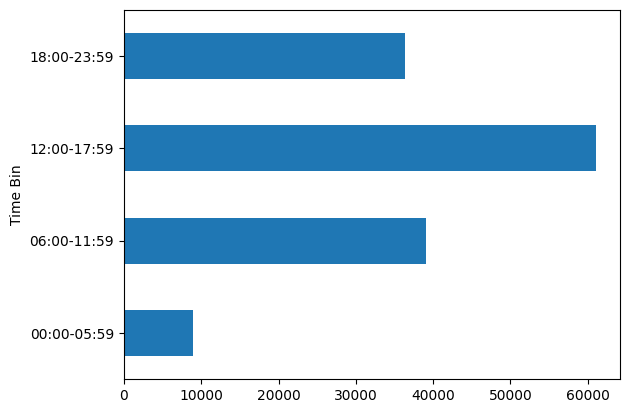

In [50]:
df['Number_of_Casualties'].groupby(df['Time Bin']).sum().plot.barh()

#### **Inferences**:

We can clearly see that most accidents occur during the afternoon `12:00 - 17:59`  while the least number of accidents occur during late night/early morning `00:00-05:59` There is a considerable difference of roughly 50,000 casualties, which implies that high traffic, amongst other reasons, during the day, could contribute to a higher number of casualties.



---


### **XII. Chi-Square Contingency Test - Categorical Variable Correlation**

We try to create two lists of all the parameters.

In [51]:
cat_var1 = ('Accident_Severity','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Day_of_Week','Speed_limit','Road_Type');
cat_var2 = ('Accident_Severity','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Day_of_Week','Speed_limit','Road_Type');

Thereafter, we multiply the two lists to get each and every possible combination of the parameteres in order to test their dependencies

In [52]:
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))
cat_var_prod

[('Accident_Severity', 'Accident_Severity'),
 ('Accident_Severity', 'Light_Conditions'),
 ('Accident_Severity', 'Weather_Conditions'),
 ('Accident_Severity', 'Road_Surface_Conditions'),
 ('Accident_Severity', 'Day_of_Week'),
 ('Accident_Severity', 'Speed_limit'),
 ('Accident_Severity', 'Road_Type'),
 ('Light_Conditions', 'Accident_Severity'),
 ('Light_Conditions', 'Light_Conditions'),
 ('Light_Conditions', 'Weather_Conditions'),
 ('Light_Conditions', 'Road_Surface_Conditions'),
 ('Light_Conditions', 'Day_of_Week'),
 ('Light_Conditions', 'Speed_limit'),
 ('Light_Conditions', 'Road_Type'),
 ('Weather_Conditions', 'Accident_Severity'),
 ('Weather_Conditions', 'Light_Conditions'),
 ('Weather_Conditions', 'Weather_Conditions'),
 ('Weather_Conditions', 'Road_Surface_Conditions'),
 ('Weather_Conditions', 'Day_of_Week'),
 ('Weather_Conditions', 'Speed_limit'),
 ('Weather_Conditions', 'Road_Type'),
 ('Road_Surface_Conditions', 'Accident_Severity'),
 ('Road_Surface_Conditions', 'Light_Conditions

We perform the Chi-square Contigency test and store the concatenated result in `result`.

In [53]:
df_chi2 = df[['Accident_Severity','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Day_of_Week','Speed_limit','Road_Type']];

In [54]:
result = []
for i in cat_var_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df_chi2[i[0]], df_chi2[i[1]])))[1]))
result

[('Accident_Severity', 'Light_Conditions', 2.832148876687024e-181),
 ('Accident_Severity', 'Weather_Conditions', 2.0749605835948748e-41),
 ('Accident_Severity', 'Road_Surface_Conditions', 2.287026226098048e-25),
 ('Accident_Severity', 'Day_of_Week', 4.039375284551256e-22),
 ('Accident_Severity', 'Speed_limit', 0.0),
 ('Accident_Severity', 'Road_Type', 2.6016376418069365e-122),
 ('Light_Conditions', 'Accident_Severity', 2.8321488766868643e-181),
 ('Light_Conditions', 'Weather_Conditions', 0.0),
 ('Light_Conditions', 'Road_Surface_Conditions', 0.0),
 ('Light_Conditions', 'Day_of_Week', 1.4039129615844574e-119),
 ('Light_Conditions', 'Speed_limit', 0.0),
 ('Light_Conditions', 'Road_Type', 1.1185752868257386e-293),
 ('Weather_Conditions', 'Accident_Severity', 2.0749605835948748e-41),
 ('Weather_Conditions', 'Light_Conditions', 0.0),
 ('Weather_Conditions', 'Road_Surface_Conditions', 0.0),
 ('Weather_Conditions', 'Day_of_Week', 2.84068795217292e-145),
 ('Weather_Conditions', 'Speed_limit', 

We form a dataframe out of `result` and display the chi-square contingency matrix

In [55]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
contigency_mat = chi_test_output.pivot(index='var1', columns='var2', values='coeff')

In [56]:
contigency_mat.head()

var2,Accident_Severity,Day_of_Week,Light_Conditions,Road_Surface_Conditions,Road_Type,Speed_limit,Weather_Conditions
var1,,,,,,,
Accident_Severity,NaN,4.039375e-22,2.832149e-181,2.287026e-25,2.601638e-122,0.000000e+00,2.074961e-41
Day_of_Week,4.039375e-22,NaN,1.403913e-119,1.954067e-101,6.495184e-03,2.851776e-15,2.840688e-145
Light_Conditions,2.832149e-181,1.403913e-119,NaN,0.000000e+00,1.118575e-293,0.000000e+00,0.000000e+00
Road_Surface_Conditions,2.287026e-25,1.954067e-101,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
Road_Type,2.601638e-122,6.495184e-03,1.118575e-293,0.000000e+00,NaN,0.000000e+00,0.000000e+00


In [57]:
contigency_mat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Accident_Severity to Weather_Conditions
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accident_Severity        6 non-null      float64
 1   Day_of_Week              6 non-null      float64
 2   Light_Conditions         6 non-null      float64
 3   Road_Surface_Conditions  6 non-null      float64
 4   Road_Type                6 non-null      float64
 5   Speed_limit              6 non-null      float64
 6   Weather_Conditions       6 non-null      float64
dtypes: float64(7)
memory usage: 448.0+ bytes


#### **A. Chi-square Test**

`Null Hypothesis (Ho)` — Parameter _i_ has an impact on accident severity

`Alternate Hypothesis (Ha)` — Accident severity is independent of parameter _i_

When we perform Chi-Square test to validate this we get `p-value` and other statistics in the output.
So, for α = 0.05, we check if `p-value <= 0.05`.

If p-value ≤ 0.05 we reject Null hypothesis, else, we accept it.

Clearly, for **each and every** parameter here, **except** `Speed_limit`, `accident_severity` is seemingly independent of the parameter, since p-value << 0.05.

#### **B. Visualization of Contingency Table**

Further, we can also visualize it with a heatmap to make it easier to visualize the dependencies

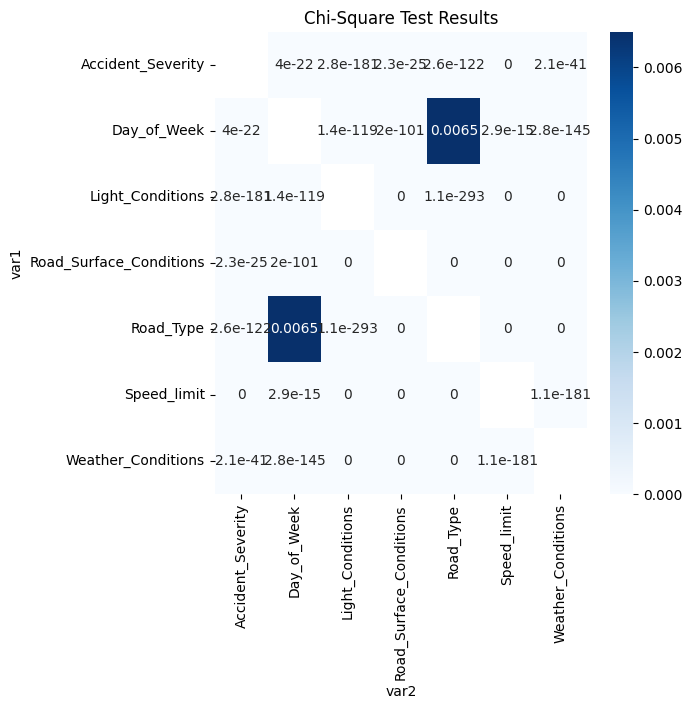

In [58]:
fig = plt.figure(figsize=(6,6))
sns.heatmap(contigency_mat, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

#### **Inferences**:

We can clearly see that `Road Type` and `Day of the Week` columns have the highest p-value. However, the p-value is still < 0.05, and hence, they are still independent. Let's try and visualize the relation between them just to be sure.  

<Axes: xlabel='Road_Type', ylabel='Day_of_Week'>

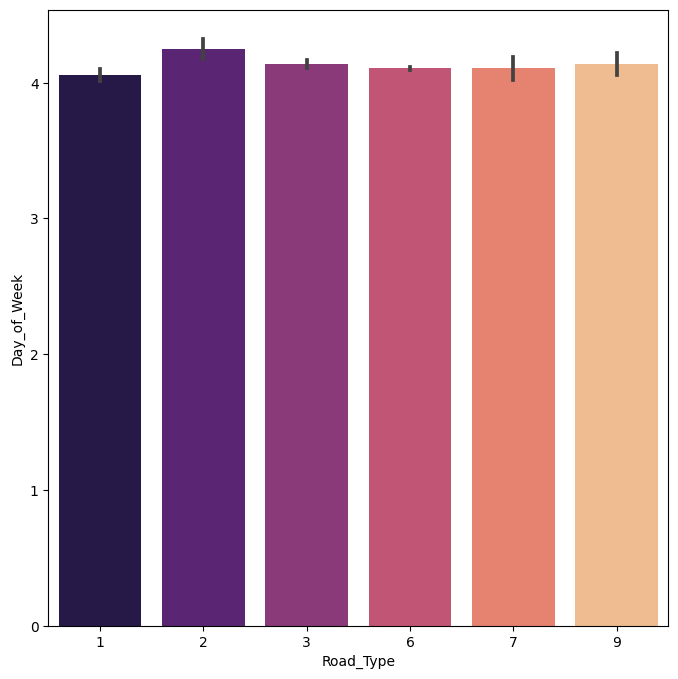

In [59]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'Road_Type', y = 'Day_of_Week', data = df, palette='magma')

Clearly, matching with our above inference, the two columns do not seem to be related

### **Dropping unrelated columns**

From above Numbers,
-   `Pedestrian_Crossing`,`Special_Conditions_at_Site`, `Carriageway_Hazards` etc can be dropped as almost 90% of the data is `None`
- `Local_Authority_(District)` and `Local_Authority_(Highway)` can also be dropped since it doesn't affect accident sveerity in any way.
- `Location_Easting_OSGR`,	`Location_Northing_OSGR`,`Longitude`	and `Latitude` can be dropped since we have already formed a new dataframe for geographical locations.
- `Pedestrian_Crossing-Physical_Facilities` can be dropped as almost 80% of the data is `None`
- `Light_Conditions` & `Weather_Conditions` can be dropped as earlier we have seen that they are not affecting accident severity
- `Did_Police_Officer_Attend_Scene_of_Accident` can be dropped as it doesn't logically impact the severity of the accident
- We can also drop `Accident_Index` as it only keeps the count of the accidents
- We can also drop `Date` and `Time` of accidents as logically they don't impact the Severity of Accidents

In [60]:
df.drop(['Local_Authority_(District)','Local_Authority_(Highway)','Location_Easting_OSGR',	'Location_Northing_OSGR',	'Longitude','Latitude','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions'
           ,'Special_Conditions_at_Site','Carriageway_Hazards','Carriageway_Hazards','Junction_Control'
           ,'Did_Police_Officer_Attend_Scene_of_Accident'], axis=1, inplace=True)

Hence, we now have the final dataset, on which we can apply machine learning algorithms and do much more!

In [61]:
df.head()

,Accident_Index,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,LSOA_of_Accident_Location,Time Bin
0,2020000000000.0,1,3,2,3,2019-02-18,2,2023-11-28 17:50:00,3,4202,1,30,1,3,4202,1,1,1,E01004762,12:00-17:59
1,2020000000000.0,1,3,2,1,2019-01-15,3,2023-11-28 21:45:00,3,23,2,30,0,-1,0,1,1,1,E01003117,18:00-23:59
2,2020000000000.0,1,3,2,1,2019-01-01,3,2023-11-28 01:50:00,4,504,6,30,3,6,0,1,1,1,E01000943,00:00-05:59
3,2020000000000.0,1,2,1,1,2019-01-01,3,2023-11-28 01:20:00,4,510,6,20,3,4,510,1,1,1,E01000973,00:00-05:59
4,2020000000000.0,1,3,2,2,2019-01-01,3,2023-11-28 00:40:00,3,4003,6,30,6,6,0,1,1,1,E01000546,00:00-05:59


With that, we are done with the EDA for the road safety dataset, hope it was fruitful and worthwhile!